### Environment Details

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
print(torch.__version__)
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

2.0.0+cu117
0
NVIDIA GeForce RTX 3070 Laptop GPU


### Generating Tensors

In [17]:
# generating tensors:
X = torch.ones(size=(1000,1000)) # ones
X = torch.zeros(size=(1000,1000)) # zeros
X = torch.normal(0,1,size=(1000,1000)) # normal 0,1
X = torch.rand(size=(1000,1000)) # random uniform[0,1]

X = torch.from_numpy(np.random.normal(size=(1000,1000))) # from numpy
X = X.numpy() # and back to numpy

torch.arange(0,10,2) # range

tensor([0, 2, 4, 6, 8])

### Memory Usage

In [41]:
# memory usage: use X+= or X[:] to avoid unnecessary copying
X, Y = torch.normal(0,1,size=(1000,1000)), torch.rand(size=(1000,1000)) 
original_id = id(X) 
print('Initial Location:', original_id) 
X += Y # in place
print('X += Y | In place:', id(X) == original_id, 'Location:', id(X))
X[:] = X+Y # in place
print('X[:] = X+Y | In place:', id(X) == original_id, 'Location:', id(X))
X = X+Y # copy (uses more memory)
print('X = X+Y, | In place:', id(X) == original_id, 'Location:', id(X))

Initial Location: 139699065675424
X += Y | In place: True Location: 139699065675424
X[:] = X+Y | In place: True Location: 139699065675424
X = X+Y, | In place: False Location: 139699066557200


### Accessing Items in Tensors

In [30]:
# accessing a single item:
a = X[0,0] # returns a 1x1 tensor
print(a, a.dtype) # show tensor and dtype
print(a.numpy()) # numpy array
print(a.item(), float(a)) # python floats


tensor(-0.5410) torch.float32
-0.54095966
-0.5409596562385559 -0.5409596562385559


### Linear Algebra

In [34]:
X @ X.T # matrix multiplaction, transpose
X.norm() # norm (frobenius i.e. l2)  c1000 = sqrt(1m) since we have 1m numbers normaly distributed N(0,1)


tensor(999.6523)

### Methods

In [39]:

X = torch.normal(0,1,size = (100,100))

# reductive:
vals, idxs = X.max(axis=1) # max
X.sum(axis=1) # sum
X.mean(axis =1) # mean

# non reductive
X.cumsum(axis=1) # cumsum

z = X.reshape(-1,1) # reshape, data is stored column first


### Automatic Differentiation

tensor([0., 0., 0., 0.])

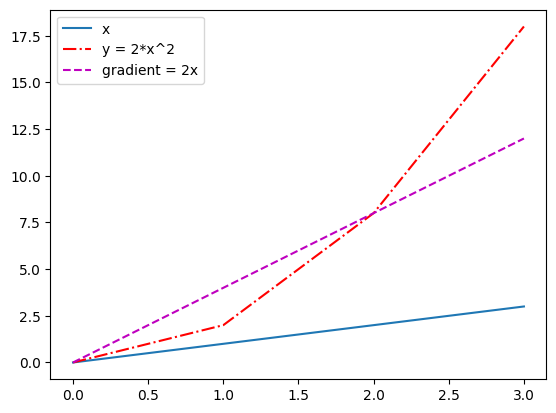

In [38]:
x = torch.arange(4.0, requires_grad=True) # we use 4.0 as integer array cannot have gradients
y = 2*x*x 
y.sum().backward() # y needs to be a scalar when computing the gradient
grads = x.grad # gradient = 4x
# before bring back to numpy we need to detach the gradient tapes
plt.plot(x.detach().numpy(), x.detach().numpy(), '-')
plt.plot(x.detach().numpy(), y.detach().numpy(), 'r-.')
plt.plot(x.detach().numpy(), grads.detach().numpy(), 'm--')
plt.legend(['x', 'y = 2*x^2', 'gradient = 2x'])
x.grad.zero_() # set back to 0